In [1]:
import sampling as smp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

training = pd.read_msgpack('training.bin')
training.columns

Index(['subject', 'img', 'pixels', 'maskArea', 'maskC', 'maskS', 'maskV',
       'maskContour', 'hasmask', 'XYextents', 'maskW', 'maskH'],
      dtype='object')

Load all contours

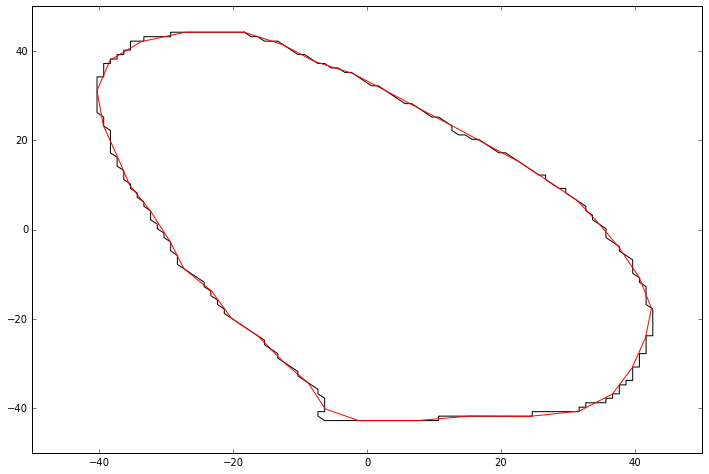

In [2]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
training.set_value(3667,'hasmask',False)
contours = training[training['hasmask']]['maskContour']
idx = 0

def downsample_contour(contour, num=50):
    C = contour - np.mean(contour,axis=0)
    T = np.linspace(0,1,C.shape[0])
    
    ius0 = InterpolatedUnivariateSpline(T, C[:,0])
    ius1 = InterpolatedUnivariateSpline(T, C[:,1])
    
    To = np.linspace(0,1,num)
    return np.vstack((ius0(To), ius1(To))).T

C = contours[idx] - np.mean(contours[idx],axis=0)
iC = downsample_contour(contours[idx], num=40)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(C[:,1], C[:,0], 'k')
ax.plot(iC[:,1], iC[:,0], 'r')

In [3]:
num=100
dsContours = np.empty((len(contours),num*2))
for idx, contour in enumerate(contours):
    dsContours[idx,:] = downsample_contour(contour, num=num).flatten(order='F')
    

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = dsContours.T
#X = StandardScaler().fit_transform(X)
#X = maskdata/np.max(abs(maskdata),axis=0)
pca = PCA(n_components=0.99)
pca.fit(X)
pca.explained_variance_ratio_

array([ 0.91090351,  0.07268177,  0.00809328])

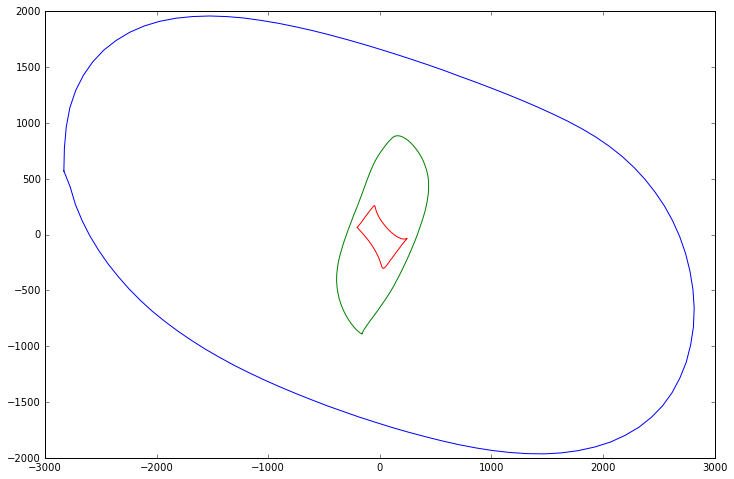

In [4]:
P = pca.fit_transform(X)
#separate x,y
Px = P[:num,:]
Py = P[num:,:]
N = len(pca.explained_variance_ratio_)
fig, ax = plt.subplots(figsize=(12,8))
#for i in range(N):
ax.plot(Px,Py,'-')

plt.show()

In [5]:
X = dsContours
#X = StandardScaler().fit_transform(X)
pca = PCA(n_components=0.95)

In [19]:
pf = pca.fit(X)
pft = pca.fit_transform(X)
pca.explained_variance_ratio_

array([ 0.71240467,  0.13808966,  0.07202077,  0.03889887])

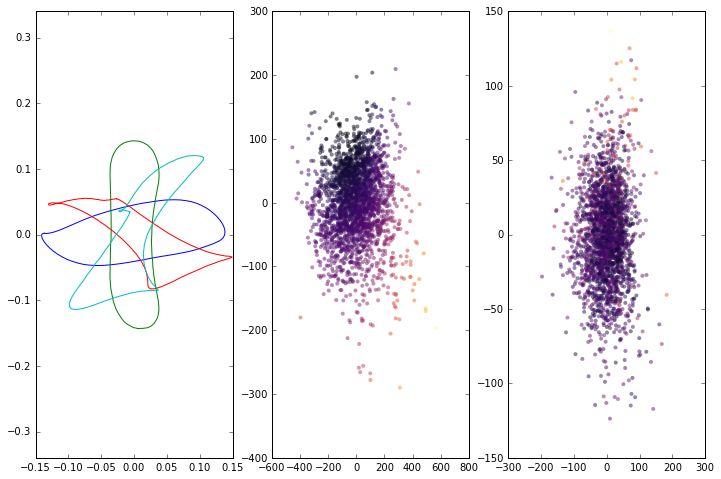

In [7]:
fig, ax = plt.subplots(1,3, figsize=(12,8))
ax[0].plot(pf.components_[:4,num:].T, pf.components_[:4,:num].T, '-', )
ax[0].axis('equal')
S = np.vstack(training[training['hasmask']]['maskS'].values)
col3 = S[:,1]/S[:,0]
col2 = np.arctan(S[:,1]/S[:,0])
col1 = training[training['hasmask']]['maskArea']
ax[1].scatter(pft[:,0], pft[:,1], s=16, c=S[:,0], alpha=0.5, edgecolors='none', cmap=plt.cm.inferno)
ax[2].scatter(pft[:,2], pft[:,3], s=16, c=S[:,0], alpha=0.5,edgecolors='none', cmap=plt.cm.inferno)

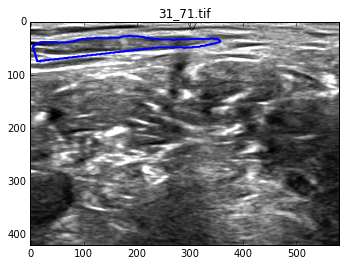

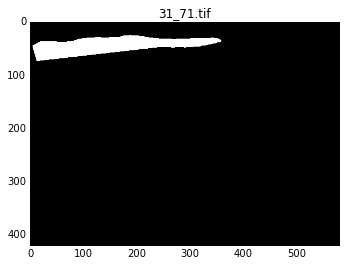

In [17]:
im_idx = 3667
im = smp.image_pair(subject=training.iloc[im_idx]['subject'], img_number=training.iloc[im_idx]['img'])
im.plot()
im.plotmask()


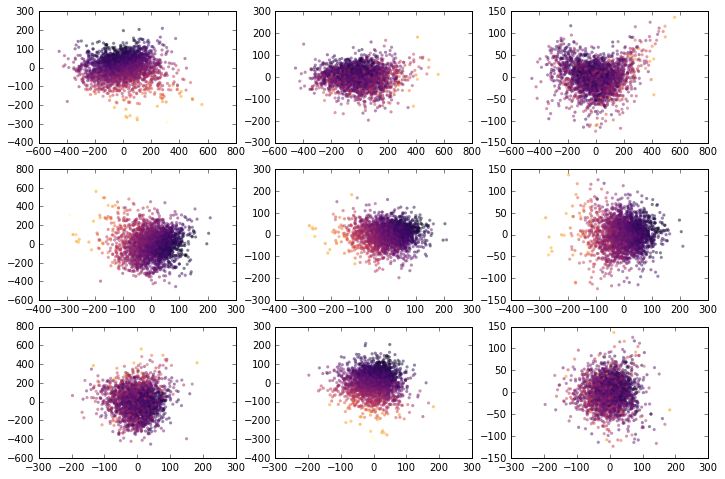

In [18]:
smp.plot_pca_comps(pft,4,s=10, c=col1, alpha=0.5, edgecolors='none', cmap=plt.cm.inferno)